**Name: Christ-Brian Amedjonekou**  
**Date: 04/24/2019**  
**PHYS 3600ID-D862 (Machine Learning) HW 7**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva**


***I certify that my work is my own.***

To work with this data set, we need to install a new image manipulation package called scikit image

pip install -U scikit-image (on MacOs X)

http://scikit-image.org/download.html

### Important! Place all the images (and just the images) in a directory called "SmallData" (or adapt the code below).

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

import skimage
from skimage.transform import resize, rescale
from skimage import io, img_as_ubyte
import cv2

In [2]:
# Do not execute this cell! This shows how we reduced the size of the
# original data set, with 68,000+ galaxies and 790 Mb

# Data comes from Galaxy Zoo and was used for this Kaggle competition

# https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge

#X = sorted(os.listdir('images_training_rev1')) 

#X_little = sorted(np.random.choice(X,500)) #Let's pick 500 of them

#for el in X_little:
#    os.system('cp images_training_rev1/'+str(el)+' SmallData/')


In [3]:
X_little = sorted(os.listdir('Datasets/SmallData/')) 

We will want to reduce the size of the original images so that the files become smaller, and the feature array is manageable. The code below shows you an example for the first image in our sample.

Text(0.5, 1.0, 'Rescaled image')

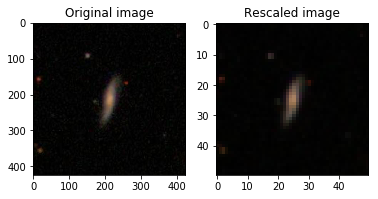

In [4]:
fig, axes = plt.subplots(ncols=2)

ax = axes.ravel()

img = skimage.io.imread('Datasets/SmallData/'+X_little[0])

img_resized = resize(img,(50,50))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(img_resized, cmap='gray')
ax[1].set_title("Rescaled image")

Q1: What are the sizes of the original and reshaped images, in pixels?

* **The size of the original image is shown below via the print statements:**

In [5]:
print('Image Size (Total # of Pixels): {}, Image Shape{} w/ {} channels'.format(img.size, img.shape, 
                                                                                img.shape[2]))

Image Size (Total # of Pixels): 539328, Image Shape(424, 424, 3) w/ 3 channels


In [6]:
print('Image Size (Total # of Pixels): {}, Image Shape{} w/ {} channels'.format(img_resized.size, 
                                                                                img_resized.shape, 
                                                                                img_resized.shape[2]))

Image Size (Total # of Pixels): 7500, Image Shape(50, 50, 3) w/ 3 channels


Q2: Try changing the size of the rescaled image to (20,20) and (100,100). Which one is the best choice in your opinion, and why?  

* **The (100,100) rescaled image is better because it uses more pixels versus the (20, 20) rescaled image**

Text(0.5, 1.0, 'Rescaled image 100 * 100')

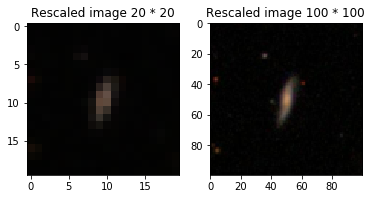

In [7]:
fig, axes = plt.subplots(ncols=2)

ax = axes.ravel()

img_resized1 = resize(img,(20,20))
img_resized2 = resize(img,(100,100))

ax[0].imshow(img_resized1, cmap='gray')
ax[0].set_title("Rescaled image 20 * 20")

ax[1].imshow(img_resized2, cmap='gray')
ax[1].set_title("Rescaled image 100 * 100")

Q3: Add comments to each line in the following cell.

In [8]:
# Let's resize all the images in the dataset
# The for loop will run the length of the X_little. 
# Basically it will run based upon the amount of images in the folder (499 times)
for i in range(len(X_little)):
    # takes an image in the SmallData directory and saves it to the variable 'img'
    img = skimage.io.imread('Datasets/SmallData/'+X_little[i])
    
    # Resizes the image to (50 x 50) dimensions
    img_resized = resize(img, (50,50))
    
    # I received the following warning: Lossy conversion from float64 to uint8. 
    # Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
    # So I did just that. This is a modification.
    img_resized = img_as_ubyte(img_resized)
    
    # Saves the resized images under a new name        
    skimage.io.imsave('Datasets/SmallData2/Image_'+str(i)+'.png',img_resized)

/Users/Chris/anaconda/envs/ml_env/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Before proceeding further, open the first image and check its size. You will see that there is more than one "layer" to the image (in other words, the shape is not just 50x50). 

Text(0.5, 1.0, 'Rescaled image 50 * 50')

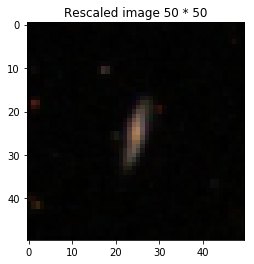

In [9]:
img = skimage.io.imread('Datasets/SmallData2/Image_0.png')

fig, ax = plt.subplots()

ax.imshow(img, cmap='gray')
ax.set_title("Rescaled image 50 * 50")

In [10]:
print('Image Size (Total # of Pixels): {}, Image Shape{} w/ {} channels'.format(img.size, img.shape, 
                                                                                img.shape[2]))

Image Size (Total # of Pixels): 7500, Image Shape(50, 50, 3) w/ 3 channels


Q4. Plot each of the "layers" of the first image, using the "imshow" command seen above. What do you think they mean? (Hint: a little google-ing might help) 

* **Are you refering to the channels of the image (ie: Red, Blue, Green, 'rbg')**

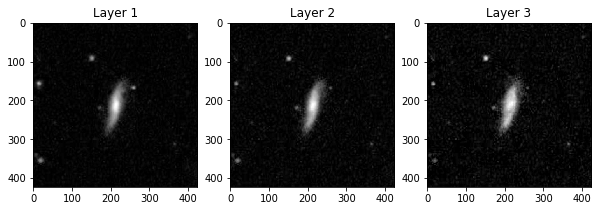

In [11]:
img = skimage.io.imread('Datasets/SmallData/'+X_little[0])
plt.figure(figsize= (10,10))
plt.subplot(2,3,1)
plt.imshow(img[:,:,0], cmap= 'gray')
plt.title('Layer 1');
plt.subplot(2,3,2)
plt.imshow(img[:,:,1], cmap= 'gray')
plt.title('Layer 2');
plt.subplot(2,3,3)
plt.imshow(img[:,:,2], cmap= 'gray')
plt.title('Layer 3');

The code below reads data from the new images and transforms it 
into a numpy array of features that can be fed through the sklearn pipeline.

In [12]:
images = []
for i in range(len(X_little)):
    img_resized =skimage.io.imread('Datasets/SmallData2/Image_'+str(i)+'.png')
    length = np.prod(img_resized.shape)
    img = np.reshape(img_resized,length)
    images.append(img)
    
images = np.vstack(images)

The code below visualizes the first 25 objects in your data set. You can run it to get a view of the first 25 galaxies. Note: you might get an error message, in this case see here 

https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-in-jupyter-notebook-when-viewing-image

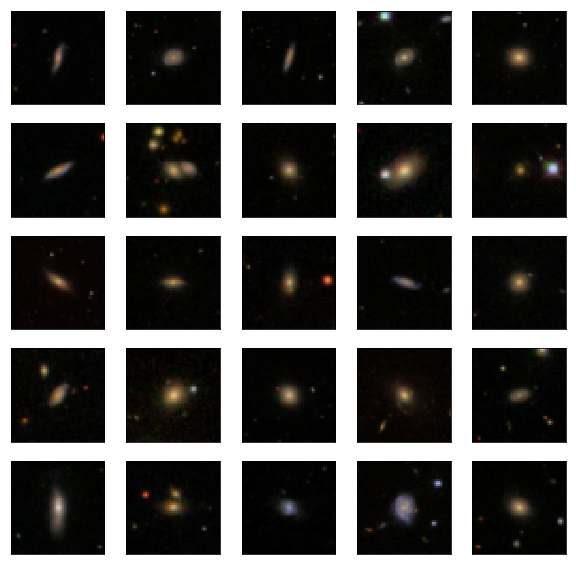

In [13]:
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(10,10))

ax = axes.ravel()

for i in range(ax.shape[0]):

    img = skimage.io.imread('Datasets/SmallData2/Image_'+str(i)+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    

Q5. For your convenience, I already made these plots to show the first 100 galaxies in the data set, so you can use them to get an idea of how galaxies look like. They are called "Postage_stamps_1.jpg", .... "Postage_stamps_4.jpg"; each one of them contains 25 galaxies, so there are 4 in total. Examine visually these four images (literally, just open them and look at them). What could be a good guess for the number of clusters, based on what you see? Justify your answer.

* **From the Postage Stamps I mostly see spiral galaxies and elliptical galaxies. Therefore I guess that there will be two clusters. I couldn't really determine if there were any barred spiral galaxies. Nevertheless, I believe this could also be a hierarchical clustering problem.**


* **Being a hierarchical clustering problem would explain the need for more clusters given that 2 clusters did not suffice in fitting the problem. That is because there are subgroups of Spiral and elliptical galaxies.**


* **I excluded irregulars as I could not identify if any where present.** 


Let's now see what Kmeans says, starting with two clusters.

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(images)
y_kmeans = kmeans.predict(images)

In this case, the predictions (the cluster to which each image belongs to) can only assume the value 0 and 1. Here we show a quick way to show which galaxies are predicted to belong to each cluster; there are other ways that you have used already, e.g. using a mask.

In [15]:
print('Value = 0:', np.where([y_kmeans == 0])[1]) 
print('\n')
print('Value = 1:', np.where([y_kmeans == 1])[1])
print('\n')
print('Amount assigned to 0:',len(np.where([y_kmeans == 0])[1]))
print('Amount assigned to 1:',len(np.where([y_kmeans == 1])[1]))

Value = 0: [  6   8  16  20  23  25  33  37  47  52  55  59  64  65  70  71  72  73
  74  80  86  88  91  93  97  98  99 101 104 105 107 111 113 118 125 131
 134 139 140 141 142 143 145 147 155 159 162 164 167 168 169 174 175 179
 180 184 186 187 189 190 193 195 197 203 205 206 208 209 213 224 228 230
 231 235 239 242 243 244 248 251 252 255 257 261 267 269 271 273 274 282
 283 286 288 290 303 305 307 310 315 316 317 319 323 332 333 336 338 339
 340 343 353 355 356 363 364 366 367 372 379 383 386 390 396 397 399 402
 404 409 411 417 418 419 420 426 427 428 429 430 431 446 449 454 457 459
 460 461 462 463 468 470 476 480 482 483 485 487 488 490]


Value = 1: [  0   1   2   3   4   5   7   9  10  11  12  13  14  15  17  18  19  21
  22  24  26  27  28  29  30  31  32  34  35  36  38  39  40  41  42  43
  44  45  46  48  49  50  51  53  54  56  57  58  60  61  62  63  66  67
  68  69  75  76  77  78  79  81  82  83  84  85  87  89  90  92  94  95
  96 100 102 103 106 108 109 110 112 114 1

We can use the code below to take a look at 25 galaxies that were placed in the first cluster and see if they look somehow alike.

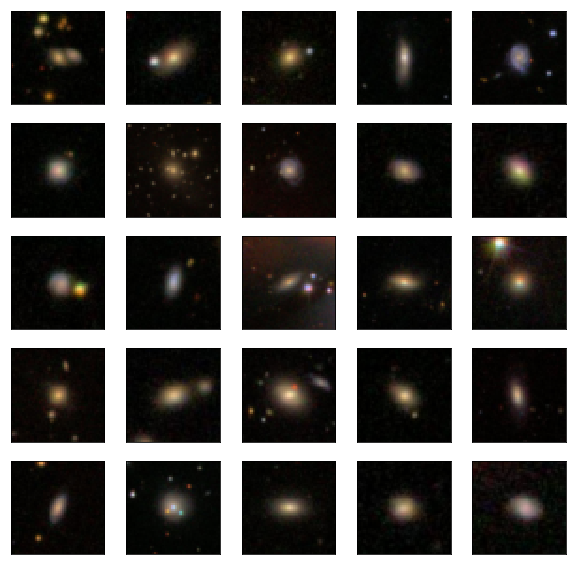

In [16]:
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(10,10))

ax = axes.ravel()

for i in range(min(len(np.where([y_kmeans == 0])[1]),25)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData2/Image_'+str(np.where([y_kmeans == 0])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

Let's now do the same thing but with five clusters.

Q6: Build a K-Means algorithm for this data set with five clusters. Choose initial conditions wisely :) 

In [17]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(images)
y_kmeans = kmeans.predict(images)

Q7: Calculate and show how many objects are assigned to each cluster.

In [18]:
print('Amount assigned to 0:',len(np.where([y_kmeans == 0])[1]))
print('Amount assigned to 1:',len(np.where([y_kmeans == 1])[1]))
print('Amount assigned to 2:',len(np.where([y_kmeans == 2])[1]))
print('Amount assigned to 3:',len(np.where([y_kmeans == 3])[1]))
print('Amount assigned to 4:',len(np.where([y_kmeans == 4])[1]))

Amount assigned to 0: 8
Amount assigned to 1: 209
Amount assigned to 2: 88
Amount assigned to 3: 193
Amount assigned to 4: 1


Q8: For each one of the clusters, plot the first 25 galaxies assigned to each cluster (or all of them if they are < 25). Note: You can do this with minimal modification to the code in the cell before Q6.

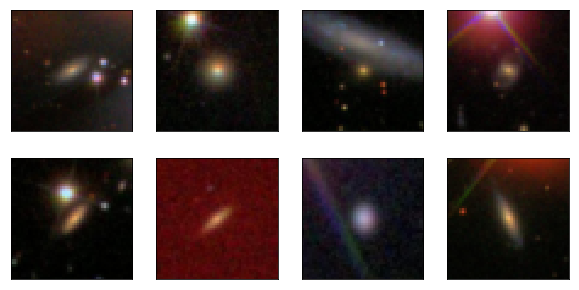

In [20]:
# Amount assigned to 0: 8
fig, axes = plt.subplots(ncols= 4, nrows = 2,figsize=(10,5))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 0])[1]),8)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData2/Image_'+str(np.where([y_kmeans == 0])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

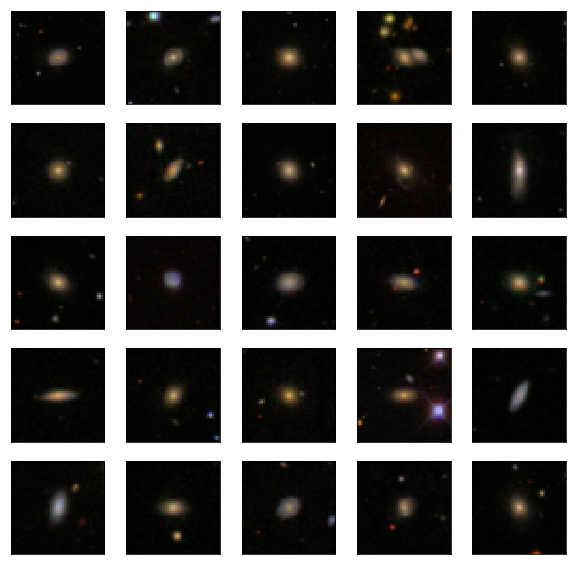

In [21]:
# Amount assigned to 1: 209
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(10,10))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 1])[1]),25)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData2/Image_'+str(np.where([y_kmeans == 1])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

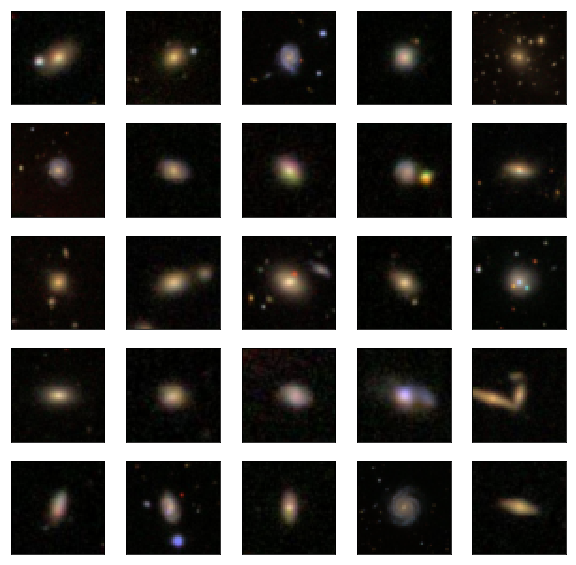

In [22]:
# Amount assigned to 2: 88
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(10,10))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 2])[1]),25)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData2/Image_'+str(np.where([y_kmeans == 2])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

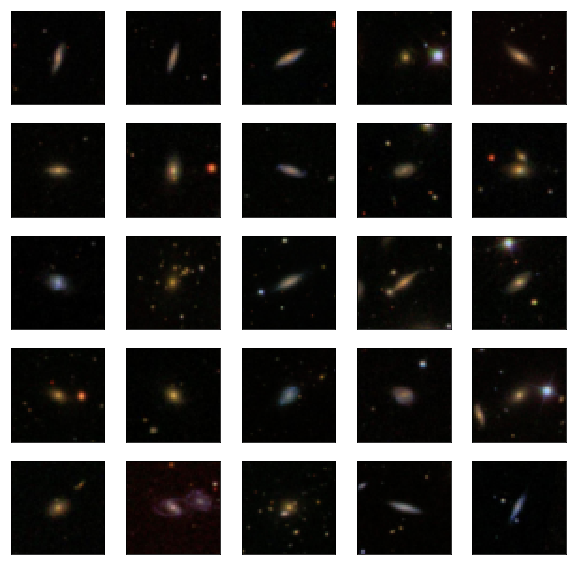

In [23]:
# Amount assigned to 3: 193
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(10,10))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 3])[1]),25)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData2/Image_'+str(np.where([y_kmeans == 3])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

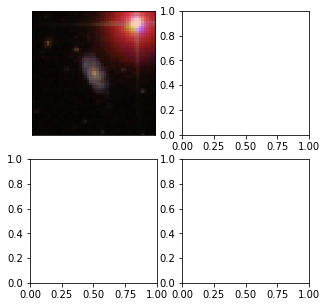

In [24]:
# Amount assigned to 4: 1
fig, axes = plt.subplots(ncols= 2, nrows = 2,figsize=(5,5))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 4])[1]),3)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData2/Image_'+str(np.where([y_kmeans == 4])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

Q9: Describe some similarities and differences between galaxies assigned to cluster 1 (or a cluster of your choice). Do you think the algorithm is successful at grouping galaxies with similar morphology?

* **Amount assign to 2: 88 $\leftarrow$ I decided to talk about this cluster.**


* **Similarities: For the most part all of them look like they are elliptical galaxies.**
* **Differencies: Some of them look as if they have mode than 1 elliptical galaxy present in the photo.**


* **Yes, I believe the algorithm is successful at grouping galaxies with similar morphology**

Q10: Build a k-means clustering model with five clusters using a different (larger) size for the images, for example 100x100. (You will have to build the data set again). Compare the results to the previous run, looking at the distribution of galaxies in their assigned clusters (note that the order of the clusters is random, so cluster 1 in the previous run might be called cluster 4 here). Do you think results are changing significantly? Why or why not?

* **Comparing the results of the previous run to the results of the current run, I can say that the results are not all that different. There was no significant change in the results. The reason for this lies, maybe, in the idea that the ratio of pixels that distiguished between clusters hadn't changed with the scaling of the images. When changing the size from shape from (50, 50) to (250, 250) we just scaled it by 5**

In [25]:
# Let's resize all the images in the dataset
# The for loop will run the length of the X_little. 
# Basically it will run based upon the amount of images in the folder (499 times)
for i in range(len(X_little)):
    # takes an image in the SmallData directory and saves it to the variable 'img'
    img = skimage.io.imread('Datasets/SmallData/'+X_little[i])
    
    # Resizes the image to (50 x 50) dimensions
    img_resized = resize(img, (250,250))
    
    # I received the following warning: Lossy conversion from float64 to uint8. 
    # Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
    # So I did just that. This is a modification.
    img_resized = img_as_ubyte(img_resized)
    
    # Saves the resized images under a new name        
    skimage.io.imsave('Datasets/SmallData3/Image_'+str(i)+'.png',img_resized)

# The code below reads data from the new images and transforms it into a numpy 
# array of features that can be fed through the sklearn pipeline.
images = []
for i in range(len(X_little)):
    img_resized =skimage.io.imread('Datasets/SmallData3/Image_'+str(i)+'.png')
    length = np.prod(img_resized.shape)
    img = np.reshape(img_resized,length)
    images.append(img)
    
images = np.vstack(images)

/Users/Chris/anaconda/envs/ml_env/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(images)
y_kmeans = kmeans.predict(images)

In [27]:
print('Amount assignt to 0:',len(np.where([y_kmeans == 0])[1]))
print('Amount assignt to 1:',len(np.where([y_kmeans == 1])[1]))
print('Amount assignt to 2:',len(np.where([y_kmeans == 2])[1]))
print('Amount assignt to 3:',len(np.where([y_kmeans == 3])[1]))
print('Amount assignt to 4:',len(np.where([y_kmeans == 4])[1]))

Amount assignt to 0: 80
Amount assignt to 1: 214
Amount assignt to 2: 193
Amount assignt to 3: 4
Amount assignt to 4: 8


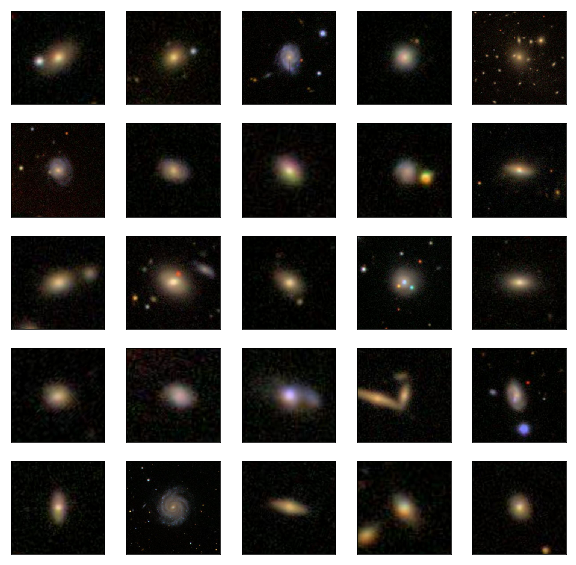

In [31]:
# Amount assignt to 0: 80
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(10,10))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 0])[1]),25)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData3/Image_'+str(np.where([y_kmeans == 0])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

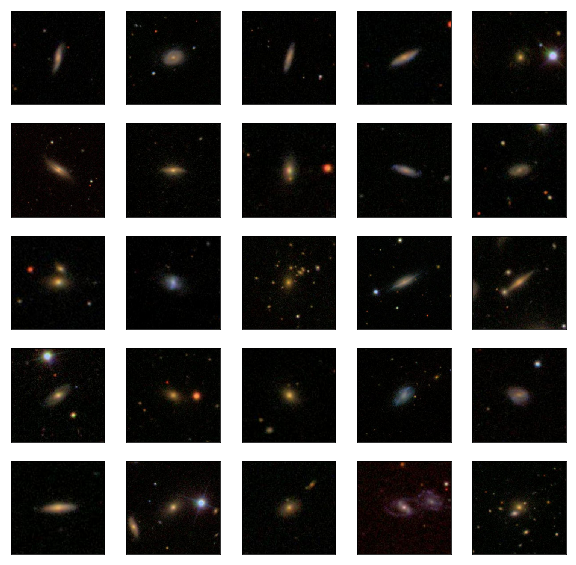

In [32]:
#Amount assignt to 1: 214   
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(10,10))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 1])[1]),25)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData3/Image_'+str(np.where([y_kmeans == 1])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

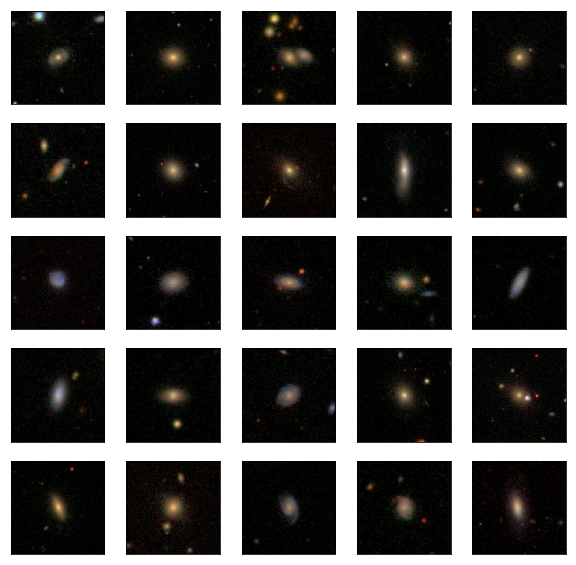

In [33]:
# Amount assignt to 2: 193
fig, axes = plt.subplots(ncols= 5, nrows = 5,figsize=(10,10))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 2])[1]),25)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData3/Image_'+str(np.where([y_kmeans == 2])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

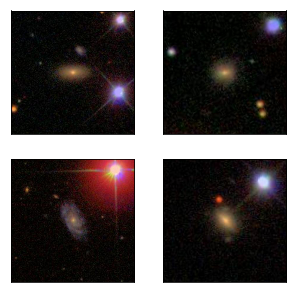

In [36]:
# Amount assignt to 3: 4
fig, axes = plt.subplots(ncols= 2, nrows = 2,figsize=(5,5))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 3])[1]),4)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData3/Image_'+str(np.where([y_kmeans == 3])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

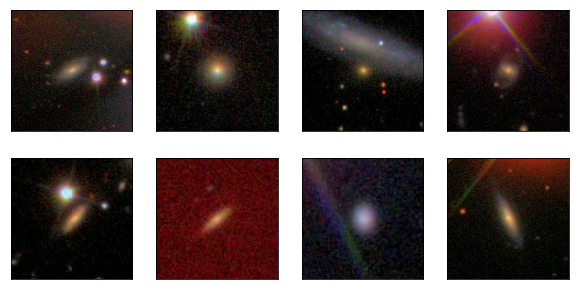

In [39]:
# Amount assignt to 4: 8
fig, axes = plt.subplots(ncols= 4, nrows = 2,figsize=(10,5))
ax = axes.ravel()
for i in range(min(len(np.where([y_kmeans == 4])[1]),8)):
    #Note: the line below selects galaxies that are assigned to cluster 0
    img = skimage.io.imread('Datasets/SmallData3/Image_'+str(np.where([y_kmeans == 4])[1][i])+'.png')
    ax[i].imshow(img, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

EC: The "Elbow method" can be used in clustering to adaptively determine the optimal number of clusters. 1. Research the elbow method and describe in words how it could be used here to find the optimal number of clusters. 2 Write a script to optimally determine the number of clusters in galaxy morphology. Based on your results, is there a clear optimal number of clusters?

Not EC but in case you are interested: Affinity Propagation is another tool used in scikit to attempt to determine the number of clusters, and the silhouette score of a cluster distribution. Example code below for your perusal.

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [ ]:
# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(images)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: {}'.format(n_clusters_))

print("Silhouette Coefficient: {}".format(metrics.silhouette_score(images, labels, metric='sqeuclidean')))